In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline



In [2]:
df = pd.read_csv("C:/Users/Avi Chaudhary/Downloads/SPAM.csv",delimiter=',',encoding='latin-1')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


C:\Users\Avi Chaudhary\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of ham and spam messages')

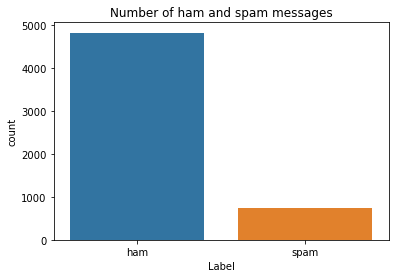

In [3]:
sns.countplot(df.Category)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

In [4]:
X = df.Message
Y = df.Category
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
# A good first step when working with text is to split it into words are called tokens and the process of splitting text into tokens is called tokenization.
# Keras provides the text_to_word_sequence() function that you use to split text into a list of words...

max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [8]:
# keras embedding layer, keras offers an embedding layer that can be used for neural networks on text data. it requires that the
# encoded, so that each word is represented by a unique integer... It can be used to Load a Pre-trained word embeddig model,

def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(65)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [9]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 65)                30160     
                                                                 
 FC1 (Dense)                 (None, 256)               16896     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [10]:
#
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
30/30 [==============================] - 8s 158ms/step - loss: 0.3336 - accuracy: 0.8762 - val_loss: 0.1810 - val_accuracy: 0.9768
Epoch 2/10
30/30 [==============================] - 4s 139ms/step - loss: 0.0850 - accuracy: 0.9807 - val_loss: 0.0741 - val_accuracy: 0.9789


In [11]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [12]:
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 1s 19ms/step - loss: 0.0797 - accuracy: 0.9725


In [13]:
print('Test set\n Loss: {:0.3f}\n Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
 Loss: 0.080
 Accuracy: 0.972


In [14]:
Testing_context =["oh k...i'm watching here:)"]

txts = tok.texts_to_sequences(Testing_context)
txts = pad_sequences(txts, maxlen=max_len)

In [15]:
preds = model.predict(txts)
print(preds)

1/1 [==============================] - 1s 616ms/step
[[0.00053484]]
